In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
img= image.load_img(r'/content/drive/MyDrive/AI/CNN/training/happy/download (1).jpeg')

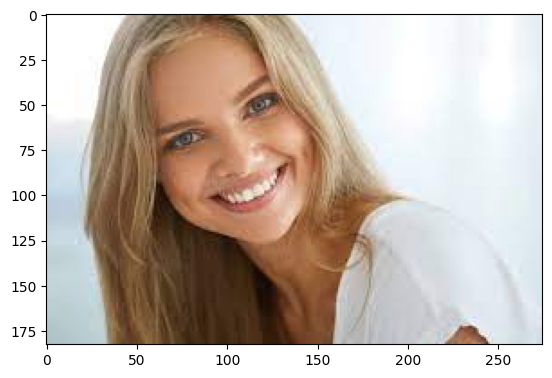

In [3]:
plt.imshow(img)

In [4]:
img1=cv2.imread(r'/content/drive/MyDrive/AI/CNN/training/happy/download (1).jpeg')
img1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [243, 237, 230],
        [241, 238, 230],
        [241, 238, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [243, 237, 230],
        [241, 238, 230],
        [241, 238, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [243, 237, 230],
        [241, 238, 230],
        [241, 238, 230]],

       ...,

       [[200, 194, 175],
        [200, 194, 175],
        [201, 195, 176],
        ...,
        [231, 222, 209],
        [233, 221, 209],
        [233, 221, 209]],

       [[200, 194, 175],
        [200, 194, 175],
        [200, 194, 175],
        ...,
        [230, 221, 208],
        [232, 220, 208],
        [232, 220, 208]],

       [[199, 193, 174],
        [199, 193, 174],
        [200, 194, 175],
        ...,
        [230, 221, 208],
        [232, 220, 208],
        [232, 220, 208]]

In [5]:
img1.shape

(183, 275, 3)

In [6]:
gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [7]:
gray_image.shape

(183, 275)

In [8]:
train= ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset=train.flow_from_directory(r'/content/drive/MyDrive/AI/CNN/training',
                                          target_size=(200,200),
                                          batch_size=3,
                                         class_mode='binary')

Found 22 images belonging to 2 classes.


In [10]:
validation_dataset=validation.flow_from_directory(r'/content/drive/MyDrive/AI/CNN/training',
                                          target_size=(200,200),
                                          batch_size=3,
                                         class_mode='binary')

Found 22 images belonging to 2 classes.


In [11]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [12]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [13]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(8,(3,3),activation ='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                     #
                                  tf.keras.layers.Conv2D(32,(3,3),activation ='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                    #
                                  tf.keras.layers.Conv2D(64,(3,3),activation ='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  #
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              metrics=['accuracy'
              ])

In [15]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=3,
                    epochs=50,
                    validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 6s 2s/step - loss: 456.9472 - accuracy: 0.4444 - val_loss: 10.8072 - val_accuracy: 0.4091
Epoch 2/50
3/3 [==============================] - 3s 928ms/step - loss: 12.4725 - accuracy: 0.4286 - val_loss: 1.5746 - val_accuracy: 0.4091
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 1.1560 - accuracy: 0.3333 - val_loss: 0.6678 - val_accuracy: 0.6818
Epoch 4/50
3/3 [==============================] - 4s 2s/step - loss: 1.3570 - accuracy: 0.5714 - val_loss: 0.7158 - val_accuracy: 0.4091
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 0.7195 - accuracy: 0.4286 - val_loss: 0.6287 - val_accuracy: 0.5909
Epoch 6/50
3/3 [==============================] - 4s 2s/step - loss: 1.0660 - accuracy: 0.7778 - val_loss: 0.7930 - val_accuracy: 0.5909
Epoch 7/50
3/3 [==============================] - 4s 2s/step - loss: 0.8276 - accuracy: 0.5556 - val_loss: 0.6869 - val_accuracy: 0.5455
Epoch 8/50
3/3 [==================

In [19]:
train_dataset

In [20]:
dir_path=r'/content/drive/MyDrive/AI/CNN/testing'
for i in os.listdir(dir_path):
  print(i)

images (2).jpeg
images (3).jpeg
images.jpeg
images (5).jpeg
images (6).jpeg


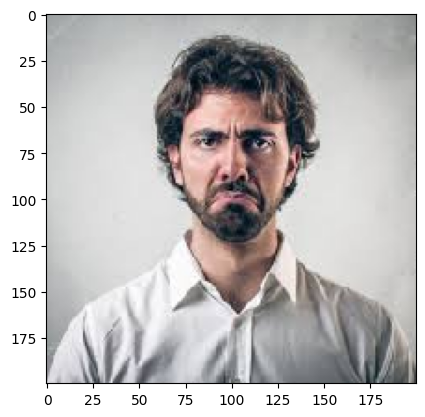

1/1 [==============================] - 0s 64ms/step
sad


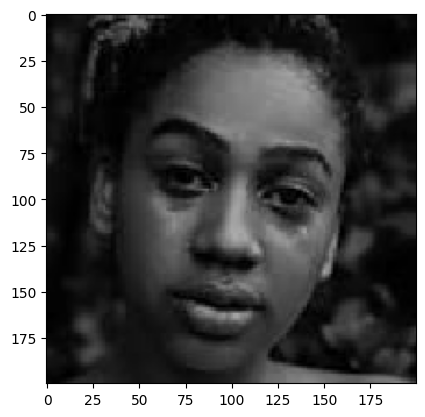

1/1 [==============================] - 0s 35ms/step
sad


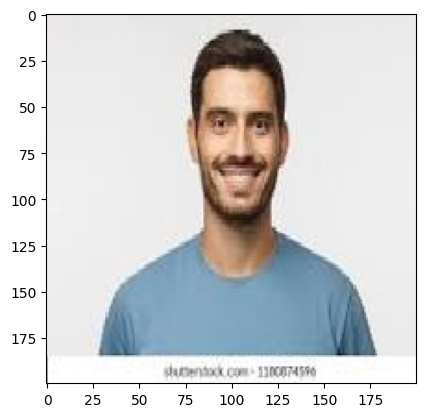

1/1 [==============================] - 0s 41ms/step
sad


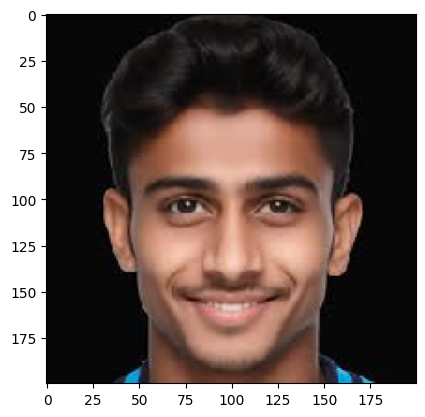

1/1 [==============================] - 0s 38ms/step
happy


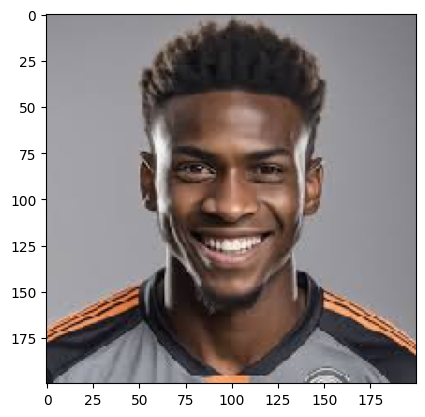

1/1 [==============================] - 0s 36ms/step
happy


In [26]:
dir_path=r'/content/drive/MyDrive/AI/CNN/testing'
for i in os.listdir(dir_path):
   img = image.load_img(dir_path+'//'+i, target_size=(200, 200))
   plt.imshow(img)
   plt.show()
   x=image.img_to_array(img)
   x=np.expand_dims(x,axis=0)
   images=np.hstack([x])
   val= model.predict(images)
   if val==0:
       print('happy')
   else:
       print("sad")